In [2]:
from pandas import DataFrame
from bunch import Bunch

% matplotlib inline

tracks = Bunch()
filepath = '/Users/loicjounot/internal-tools/tracks/2016-01-01.csv'
tracks.raw = DataFrame().from_csv(filepath)

In [3]:
tracks.raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743518 entries, 0 to 17
Data columns (total 22 columns):
accuracy             743518 non-null float64
altitude             743518 non-null float64
battery              743518 non-null float64
bearing              251826 non-null float64
created_at           743518 non-null object
datetime             743518 non-null object
deleted_at           0 non-null float64
device               251826 non-null object
driver               743518 non-null object
gsm_signal           251826 non-null float64
lat                  743518 non-null float64
lng                  743518 non-null float64
location             743518 non-null object
location_provider    251826 non-null object
modified_at          743518 non-null object
network_type         250846 non-null object
num_satelites        0 non-null float64
route                164911 non-null object
shift                251298 non-null object
speed                743518 non-null float64
ts_milisecond

In [4]:
tracks.raw.driver.iloc[0]

'cb2f2ed9-ed06-4bb7-a962-9e65f284029d'

In [5]:
from datetime import datetime

milliseconds = tracks.raw.ts_milisecond.iloc[0]

timestamp = datetime.fromtimestamp(milliseconds/1000)
timestamp

datetime.datetime(2016, 1, 1, 1, 0, 0, 62000)

In [6]:
tracks.raw['seconds'] = tracks.raw['ts_milisecond'] / 1000
tracks.raw.seconds.min(), tracks.raw.seconds.max()

(1451606400.062, 1451692799.8280001)

In [7]:
tracks.test = tracks.raw[tracks.raw.driver == 'cb2f2ed9-ed06-4bb7-a962-9e65f284029d']

In [8]:
tracks.test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 0 to 428
Data columns (total 23 columns):
accuracy             1037 non-null float64
altitude             1037 non-null float64
battery              1037 non-null float64
bearing              1037 non-null float64
created_at           1037 non-null object
datetime             1037 non-null object
deleted_at           0 non-null float64
device               1037 non-null object
driver               1037 non-null object
gsm_signal           1037 non-null float64
lat                  1037 non-null float64
lng                  1037 non-null float64
location             1037 non-null object
location_provider    1037 non-null object
modified_at          1037 non-null object
network_type         1010 non-null object
num_satelites        0 non-null float64
route                776 non-null object
shift                1037 non-null object
speed                1037 non-null float64
ts_milisecond        1037 non-null float64
uuid    

In [9]:
from pandas import DatetimeIndex

timestamps = tracks.test.seconds.map(lambda x: datetime.fromtimestamp(x))
timestamps[:5]

0     2016-01-01 01:00:00.062
27    2016-01-01 01:01:09.341
390   2016-01-01 01:01:54.398
318   2016-01-01 01:02:44.922
227   2016-01-01 01:03:31.917
Name: seconds, dtype: datetime64[ns]

In [10]:
ts_index = DatetimeIndex(tracks.test['datetime'])
ts_index

DatetimeIndex(['2016-01-01 00:00:00.062000', '2016-01-01 00:01:09.341000',
               '2016-01-01 00:01:54.398000', '2016-01-01 00:02:44.922000',
               '2016-01-01 00:03:31.917000', '2016-01-01 00:04:30.453000',
               '2016-01-01 00:05:15.887000', '2016-01-01 00:06:18.583000',
               '2016-01-01 00:07:09.305000', '2016-01-01 00:07:55.635000',
               ...
               '2016-01-01 23:51:07.878000', '2016-01-01 23:52:14.979000',
               '2016-01-01 23:53:05.954000', '2016-01-01 23:53:51.106000',
               '2016-01-01 23:55:19.883000', '2016-01-01 23:56:06.126000',
               '2016-01-01 23:56:51.124000', '2016-01-01 23:57:36.394000',
               '2016-01-01 23:59:02.696000', '2016-01-01 23:59:49.752000'],
              dtype='datetime64[ns]', length=1037, freq=None)

In [11]:
tracks.test.set_index(ts_index, inplace=True)
tracks.test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1037 entries, 2016-01-01 00:00:00.062000 to 2016-01-01 23:59:49.752000
Data columns (total 23 columns):
accuracy             1037 non-null float64
altitude             1037 non-null float64
battery              1037 non-null float64
bearing              1037 non-null float64
created_at           1037 non-null object
datetime             1037 non-null object
deleted_at           0 non-null float64
device               1037 non-null object
driver               1037 non-null object
gsm_signal           1037 non-null float64
lat                  1037 non-null float64
lng                  1037 non-null float64
location             1037 non-null object
location_provider    1037 non-null object
modified_at          1037 non-null object
network_type         1010 non-null object
num_satelites        0 non-null float64
route                776 non-null object
shift                1037 non-null object
speed                1037 non-null float64


In [12]:
from folium import Map, PolyLine
# Coordinates are 15 points on the great circle from Boston to 
# San Francisco.
# Reference: http://williams.best.vwh.net/avform.htm#Intermediate
coordinates = [
    [  42.3581    ,  -71.0636    ],
    [  42.82995815,  -74.78991444],
    [  43.17929819,  -78.56603306],
    [  43.40320216,  -82.37774519],
    [  43.49975489,  -86.20965845],
    [  43.46811941,  -90.04569087],
    [  43.30857071,  -93.86961818],
    [  43.02248456,  -97.66563267],
    [  42.61228259, -101.41886832],
    [  42.08133868, -105.11585198],
    [  41.4338549 , -108.74485069],
    [  40.67471747, -112.29609954],
    [  39.8093434 , -115.76190821],
    [  38.84352776, -119.13665678],
    [  37.7833    , -122.4167    ]]


# Create the map and add the line
usa = Map(location=[41.9, -97.3], zoom_start=4)
line = PolyLine(coordinates, color='#FF0000', weight=5)
usa.add_children(line)

usa

In [13]:
from pandas import Series

lat = tracks.test['lat'].values
lon = tracks.test['lng'].values
latlon = zip(lat, lon)

map_center = [tracks.test['lat'].mean(), tracks.test['lng'].mean()]
map_center

[52.959232783027971, -1.1656353319189969]

In [14]:
test_map = Map(map_center, zoom_start=12)
test_map

In [15]:
test_line = PolyLine(latlon, color='#FF0000', weight=5)
test_map.add_children(test_line)
test_map

In [16]:
tracks.test.describe()

,accuracy,altitude,battery,bearing,deleted_at,gsm_signal,lat,lng,num_satelites,speed,ts_milisecond,seconds
count,1037.000000,1037.000000,1037.000000,1037.000000,0,1037.000000,1037.000000,1037.000000,0,1037.000000,1.037000e+03,1.037000e+03
mean,52.152511,45.639344,74.266152,56.402122,NaN,14.163934,52.959233,-1.165635,NaN,2.261508,1.451656e+12,1.451656e+09
std,117.558335,53.902163,20.334048,105.572421,NaN,11.915814,0.020262,0.027855,NaN,4.238967,2.915624e+07,2.915624e+04
min,3.000000,-159.000000,30.000002,0.000000,NaN,0.000000,52.876951,-1.241690,NaN,0.000000,1.451606e+12,1.451606e+09
25%,14.000000,0.000000,58.999996,0.000000,NaN,9.000000,52.954058,-1.180019,NaN,0.000000,1.451621e+12,1.451621e+09
50%,30.000000,0.000000,78.000000,0.000000,NaN,13.000000,52.959694,-1.169988,NaN,0.000000,1.451666e+12,1.451666e+09
75%,45.000000,93.000000,92.000000,53.000000,NaN,18.000000,52.968013,-1.149555,NaN,1.750000,1.451680e+12,1.451680e+09
max,1399.999000,238.000000,100.000000,359.000000,NaN,99.000000,53.005199,-1.082701,NaN,19.250000,1.451693e+12,1.451693e+09


In [17]:
from matplotlib import style
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = (16.0, 12.0)
style.use('ggplot')

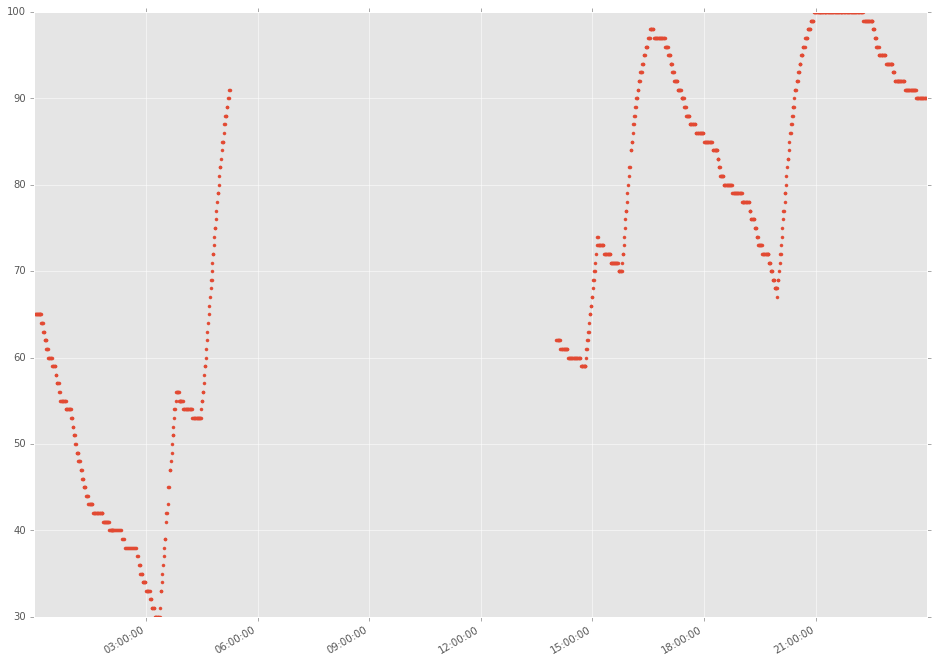

In [18]:
tracks.test.battery.plot(style='.')

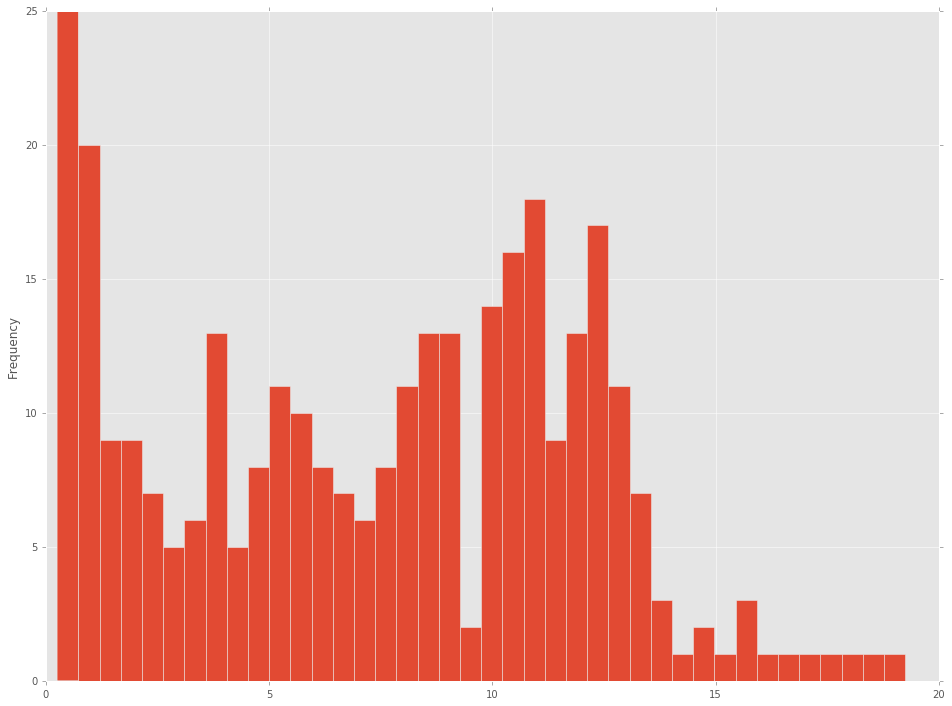

In [19]:
tracks.test[tracks.test.speed > 0].speed.plot(kind='hist', bins=40)

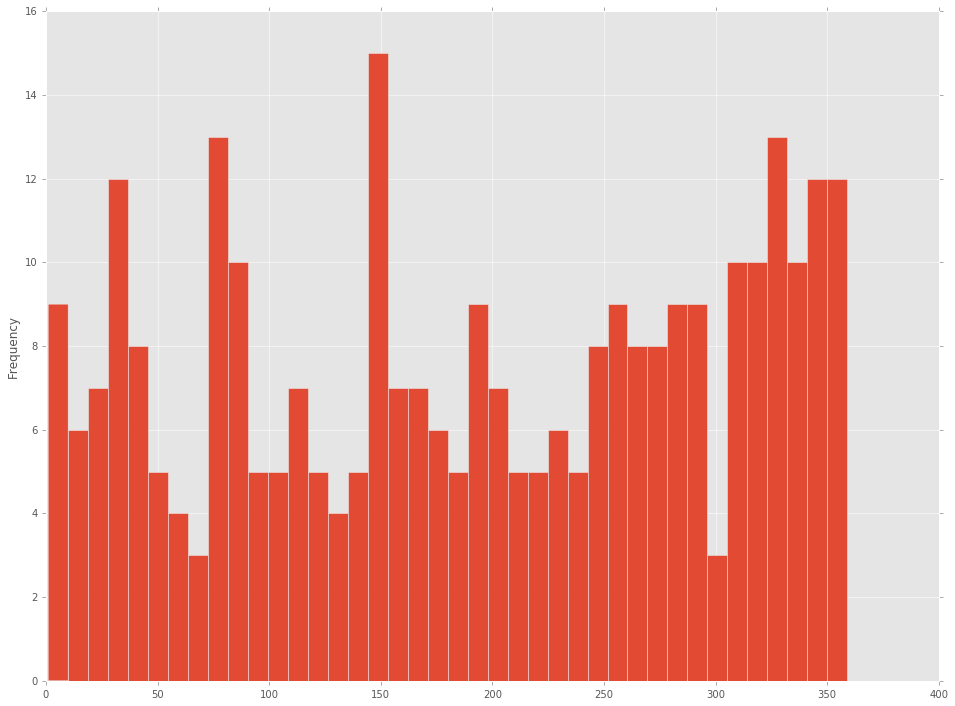

In [20]:
tracks.test.bearing[tracks.test.bearing > 0.1].plot(kind='hist', bins=40)

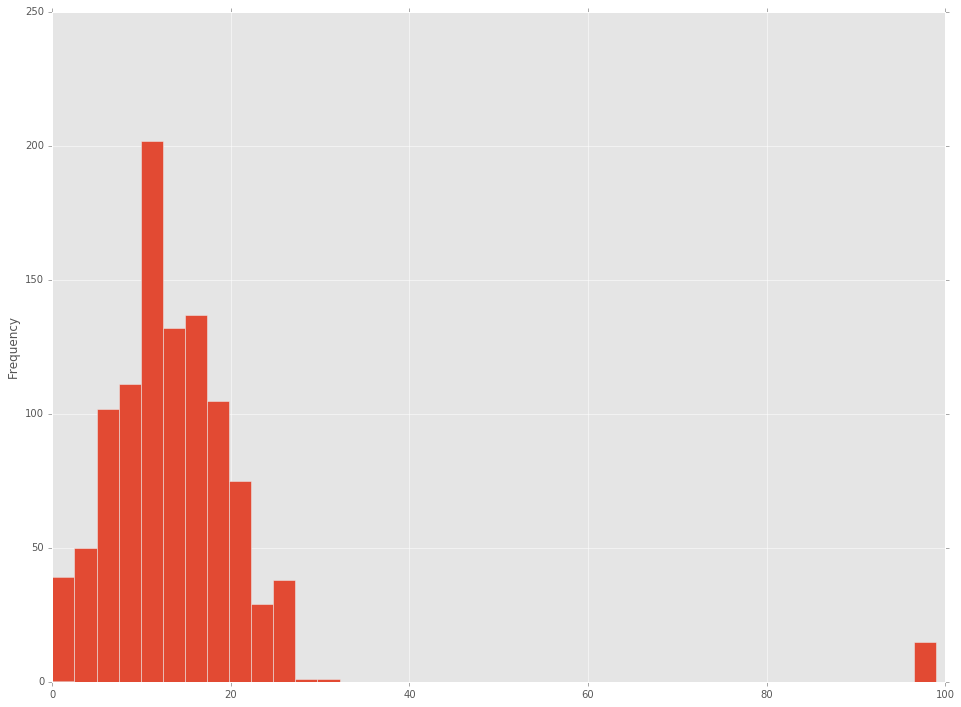

In [21]:
tracks.test.gsm_signal.plot(kind='hist', bins=40)

In [22]:
from sys import path
from pprint import pprint 

path.append('/Users/loicjounot/Code/internal-tools/')
pprint(path)

['',
 '/Users/loicjounot/anaconda/envs/internal-tools/lib/python35.zip',
 '/Users/loicjounot/anaconda/envs/internal-tools/lib/python3.5',
 '/Users/loicjounot/anaconda/envs/internal-tools/lib/python3.5/plat-darwin',
 '/Users/loicjounot/anaconda/envs/internal-tools/lib/python3.5/lib-dynload',
 '/Users/loicjounot/anaconda/envs/internal-tools/lib/python3.5/site-packages/setuptools-19.6.2-py3.5.egg',
 '/Users/loicjounot/anaconda/envs/internal-tools/lib/python3.5/site-packages',
 '/Users/loicjounot/anaconda/envs/internal-tools/lib/python3.5/site-packages/IPython/extensions',
 '/Users/loicjounot/.ipython',
 '/Users/loicjounot/Code/internal-tools/']


In [23]:
from connectors.sql import WarehouseConnector

dwh = WarehouseConnector()
sql = "select * from tableau.delivery_dwh where driver_uuid = 'cb2f2ed9-ed06-4bb7-a962-9e65f284029d'"
deliveries = dwh.execute(sql)

In [24]:
deliveries.head()

,fleet_backend_name,timezone,order_uuid,delivery_uuid,delivery_short_id,source_name,source_id,route_id,ordering_in_route,source_transaction_id,...,driver_odoo_name,driver_odoo_id,driver_odoo_external_id,driver_backend_last_name,driver_backend_first_name,driver_backend_phone_number,driver_planday_last_name,driver_planday_first_name,driver_planday_username,fleet_city
0,nottingham,Europe/London,5a48d08a-db18-47dc-a81f-756299cc257c,f991e84e-80c0-4d46-84f0-927a11caaaf9,,backchannel,,b881600f-17c8-411e-ab4a-f51374aa9d40,NaN,5a48d08a-db18-47dc-a81f-756299cc257c,...,None,None,None,None,None,None,None,None,None,Nottingham
1,nottingham,Europe/London,cf67f8e0-5311-4b0d-aada-c02290813361,6db52321-e869-4d76-975b-f0d1799524d3,,backchannel,,1c197439-896d-4fed-b6d6-90dcb678f2b0,0,cf67f8e0-5311-4b0d-aada-c02290813361,...,None,None,None,None,None,None,None,None,None,Nottingham
2,nottingham,Europe/London,ca2c22be-0cc5-49bf-b29d-465fdcefb1df,08687ddb-8a60-42b2-a6c9-6c3d20557bb1,,backchannel,,50e18fec-875d-4c2a-8150-9f6c03667f3e,0,ca2c22be-0cc5-49bf-b29d-465fdcefb1df,...,None,None,None,None,None,None,None,None,None,Nottingham
3,nottingham,Europe/London,a2db8653-50b3-4ab7-972f-bf1f21194707,026d61ae-5421-47aa-9f11-f2aaf4eb75af,,backchannel,,09fa9abf-55e3-4335-b181-cea8dac46fa5,0,a2db8653-50b3-4ab7-972f-bf1f21194707,...,None,None,None,None,None,None,None,None,None,Nottingham
4,nottingham,Europe/London,648110f0-183e-4438-b0b0-4f376139ebff,f6c84cdc-3e72-42bc-918a-dd17b0294356,,yReceipts,ahBzfnlyZWNlaXB0cy1wcm9kchQLEgdSZWNlaXB0GICA0O...,d95bad7c-d578-4300-8aa5-afe94fb26331,0,B21,...,None,None,None,None,None,None,None,None,None,Nottingham


In [25]:
datetime_min = datetime(2016, 1, 1, 0, 0, 0)
datetime_max = datetime(2016, 1, 1, 23, 59, 59)

deliveries.sort_values(by='created_at_timestamp', inplace=True)
deliveries.set_index(DatetimeIndex(deliveries.created_at_timestamp), inplace=True)
deliveries = deliveries[datetime_min:datetime_max]
deliveries.head()

,fleet_backend_name,timezone,order_uuid,delivery_uuid,delivery_short_id,source_name,source_id,route_id,ordering_in_route,source_transaction_id,...,driver_odoo_name,driver_odoo_id,driver_odoo_external_id,driver_backend_last_name,driver_backend_first_name,driver_backend_phone_number,driver_planday_last_name,driver_planday_first_name,driver_planday_username,fleet_city
2016-01-01 00:28:26,nottingham,Europe/London,728de9b3-869c-4d79-82ce-16940ff8ec2a,105d3bdd-5dfe-4101-b953-01cbf7b75277,,backchannel,,55f81e1b-0370-449c-a49f-b338435ec27c,0,728de9b3-869c-4d79-82ce-16940ff8ec2a,...,None,None,None,None,None,None,None,None,None,Nottingham
2016-01-01 01:12:06,nottingham,Europe/London,7a11ea99-3475-436a-94d3-88c57d7bd689,ee7fecba-89c8-4309-9c07-8f56caa019dd,,backchannel,,1e6af59c-0bfa-47bc-9cbe-5271857e2b4d,0,7a11ea99-3475-436a-94d3-88c57d7bd689,...,None,None,None,None,None,None,None,None,None,Nottingham
2016-01-01 02:00:09,nottingham,Europe/London,eb53e318-2bea-4d92-b1ce-7e890bf88600,9cc35fb9-3216-4ab7-8a54-4e5c144c579b,,backchannel,,81a5953a-45b3-4caa-81dc-f8c185843076,0,eb53e318-2bea-4d92-b1ce-7e890bf88600,...,None,None,None,None,None,None,None,None,None,Nottingham
2016-01-01 02:26:08,nottingham,Europe/London,60e556e2-96cb-420e-acca-46fcb495b8e7,cb4119b1-8e5e-4166-a8bc-db68720e36e3,,backchannel,,33dbb7e6-9706-42c5-b7e5-25625fe7d1c5,0,60e556e2-96cb-420e-acca-46fcb495b8e7,...,None,None,None,None,None,None,None,None,None,Nottingham
2016-01-01 02:50:21,nottingham,Europe/London,0a7e872e-f258-4223-9635-d762cf146c7b,58aad91c-7303-4482-8532-3cc2f7fe62f6,,backchannel,,33dbb7e6-9706-42c5-b7e5-25625fe7d1c5,1,0a7e872e-f258-4223-9635-d762cf146c7b,...,None,None,None,None,None,None,None,None,None,Nottingham


In [26]:
deliveries.shape

(24, 78)

In [27]:
deliveries.columns

Index(['fleet_backend_name', 'timezone', 'order_uuid', 'delivery_uuid',
       'delivery_short_id', 'source_name', 'source_id', 'route_id',
       'ordering_in_route', 'source_transaction_id', 'restaurant_uuid',
       'restaurant_name', 'restaurant_city', 'restaurant_zipcode',
       'restaurant_source_id', 'driver_username', 'battery_status',
       'customer_phone_number', 'customer_street', 'customer_number',
       'customer_zipcode', 'customer_city', 'customer_country',
       'customer_raw_address', 'distance_to_customer',
       'distance_traveled_to_customer', 'distance_to_restaurant',
       'distance_traveled_to_restaurant', 'total', 'payment_type',
       'delivery_fee', 'last_delivery_status',
       'last_delivery_status_timestamp', 'transaction_timestamp',
       'created_at_timestamp', 'assigned_timestamp', 'fc_reaction_timestamp',
       'assignment_accuracy', 'accepted_timestamp',
       'driver_reaction_timestamp', 'at_restaurant_timestamp',
       'start_route_times

In [28]:
pprint(set(zip(deliveries.restaurant_uuid.values, deliveries.restaurant_name.values)))

{('276d72ea-a403-4661-aec2-956599ca3715', 'Kabul Bukhara'),
 ('3265b8db-f1d8-476b-b1e7-a3ffc442c5ef', 'Munchies'),
 ('4cca60a8-802b-47f4-b400-57ea1f4b64e5', 'Peking house'),
 ('64e820d4-9d03-486b-b1d5-172c26092816', 'Crunch Munch'),
 ('80f89651-f011-4b8f-82fa-61cee733a34d', 'Kathmandu'),
 ('898a6ec4-3019-498c-909f-c6c44759ff28', 'UK Pizza'),
 ('8b60b703-e56e-4b28-af75-f6781e8b50b5', 'City Kebab House'),
 ('8f0e5af7-0b86-4a4f-8407-71346ff3f3d2', "Mario's Fast Food"),
 ('915773f0-a9dc-4f83-ae3f-f8f61fb5a289', 'Chunky Chicken'),
 ('a134eb8e-ecda-4686-9627-f42eedbca1f8', 'Trent bridge Spice'),
 ('c4c1e008-c3b2-4036-9b80-0055dbdd7630', 'B-Beirut'),
 ('cd9a9643-da69-496f-b285-792236d760c6', 'Chilli Hut'),
 ('e8a5dd81-21b4-48c0-bf8d-b2389053ba64', 'Ronnies')}


In [29]:
from pandas import read_clipboard

columns = [
    'restaurant_uuid', 
    'restaurant_name', 
    'address_uuid', 
    'lat', 
    'lon'
]
restaurants = read_clipboard(names=columns)
restaurants.head()

,restaurant_uuid,restaurant_name,address_uuid,lat,lon
0,http://joergdsbucket.s3.amazonaws.com/,NaN,NaN,NaN,NaN


In [30]:
restaurants_delivered = deliveries.join(restaurants, on='restaurant_uuid', how='left', lsuffix='r_', sort=False)
restaurants_delivered.head()

,fleet_backend_name,timezone,order_uuid,delivery_uuid,delivery_short_id,source_name,source_id,route_id,ordering_in_route,source_transaction_id,...,driver_backend_phone_number,driver_planday_last_name,driver_planday_first_name,driver_planday_username,fleet_city,restaurant_uuid,restaurant_name,address_uuid,lat,lon
2016-01-01 00:28:26,nottingham,Europe/London,728de9b3-869c-4d79-82ce-16940ff8ec2a,105d3bdd-5dfe-4101-b953-01cbf7b75277,,backchannel,,55f81e1b-0370-449c-a49f-b338435ec27c,0,728de9b3-869c-4d79-82ce-16940ff8ec2a,...,None,None,None,None,Nottingham,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:12:06,nottingham,Europe/London,7a11ea99-3475-436a-94d3-88c57d7bd689,ee7fecba-89c8-4309-9c07-8f56caa019dd,,backchannel,,1e6af59c-0bfa-47bc-9cbe-5271857e2b4d,0,7a11ea99-3475-436a-94d3-88c57d7bd689,...,None,None,None,None,Nottingham,NaN,NaN,NaN,NaN,NaN
2016-01-01 02:00:09,nottingham,Europe/London,eb53e318-2bea-4d92-b1ce-7e890bf88600,9cc35fb9-3216-4ab7-8a54-4e5c144c579b,,backchannel,,81a5953a-45b3-4caa-81dc-f8c185843076,0,eb53e318-2bea-4d92-b1ce-7e890bf88600,...,None,None,None,None,Nottingham,NaN,NaN,NaN,NaN,NaN
2016-01-01 02:26:08,nottingham,Europe/London,60e556e2-96cb-420e-acca-46fcb495b8e7,cb4119b1-8e5e-4166-a8bc-db68720e36e3,,backchannel,,33dbb7e6-9706-42c5-b7e5-25625fe7d1c5,0,60e556e2-96cb-420e-acca-46fcb495b8e7,...,None,None,None,None,Nottingham,NaN,NaN,NaN,NaN,NaN
2016-01-01 02:50:21,nottingham,Europe/London,0a7e872e-f258-4223-9635-d762cf146c7b,58aad91c-7303-4482-8532-3cc2f7fe62f6,,backchannel,,33dbb7e6-9706-42c5-b7e5-25625fe7d1c5,1,0a7e872e-f258-4223-9635-d762cf146c7b,...,None,None,None,None,Nottingham,NaN,NaN,NaN,NaN,NaN


In [31]:
restaurant_coordinates = zip(restaurants_delivered.lat.values, restaurants_delivered.lon.values)
list(restaurant_coordinates)

[(nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan)]

In [32]:
from connectors.valkfleet import ValkfleetConnector
api = ValkfleetConnector()

In [33]:
restaurant = api.get_record('restaurants', 'e8a5dd81-21b4-48c0-bf8d-b2389053ba64')
restaurant

{'address': {'city': 'Nottingham',
  'city_name': 'Nottingham',
  'comment': None,
  'country': 'United Kingdom',
  'created_at': '2015-10-14T16:29:06+00:00',
  'deleted_at': None,
  'formatted_address': 'Main Street 261, NG68EZ Nottingham, United Kingdom',
  'geocoding_log': [],
  'lat': 53.002955,
  'lng': -1.196228,
  'location': {'lat': 53.002955, 'lng': -1.196228},
  'location_type': None,
  'location_uuid': None,
  'modified_at': '2015-10-14T16:29:06+00:00',
  'number': '261',
  'phone_number': '01158379505',
  'raw_address': 'Main Street,261,NG68EZ,Nottingham,United Kingdom',
  'street': 'Main Street',
  'uuid': '331695bd-2a7f-45fb-8252-f2b34afc13b3',
  'zipcode': 'NG68EZ'},
 'address_uuid': '331695bd-2a7f-45fb-8252-f2b34afc13b3',
 'city': '6c788788-b4e9-4bd7-abfc-cb2bdb8efb2b',
 'created_at': '2015-10-14T14:40:47+00:00',
 'deleted_at': None,
 'dont_process': False,
 'fleet': '89a0e793-26b4-46ba-bcde-57d3543fb391',
 'ignore': False,
 'metadata': {'created_at': '2015-10-14T16:29:

In [34]:
from folium import Marker

markers = []
for uuid, name in set(zip(deliveries.restaurant_uuid.values, deliveries.restaurant_name.values)):
    restaurant = api.get_record('restaurants', uuid)
    marker = Marker([restaurant['address']['lat'], restaurant['address']['lng']], popup=name)
    markers.append(marker)
    
markers

In [35]:
for m in markers:
    test_map.add_children(m)
test_map

In [36]:
customers = list(zip(deliveries.customer_lat.values, deliveries.customer_lng.values))
customers

[(52.8767, -1.0879300000000001),
 (52.972499999999997, -1.11337),
 (52.9925, -1.19669),
 (53.027900000000002, -1.23367),
 (52.999099999999999, -1.2414000000000001),
 (52.968600000000002, -1.16916),
 (52.950499999999998, -1.12415),
 (52.913600000000002, -1.1800999999999999),
 (52.960299999999997, -1.15032),
 (52.940300000000001, -1.1863600000000001),
 (52.990499999999997, -1.1079699999999999),
 (52.9754, -1.1351899999999999),
 (52.9803, -1.15513),
 (52.951000000000001, -1.1272500000000001),
 (52.950699999999998, -1.12087),
 (52.952199999999998, -1.1764399999999999),
 (52.955800000000004, -1.2164699999999999),
 (52.974899999999998, -1.2306600000000001),
 (52.981299999999997, -1.15083),
 (52.973100000000002, -1.2022900000000001),
 (52.981000000000002, -1.19129),
 (52.991700000000002, -1.19642),
 (52.954500000000003, -1.1711199999999999),
 (53.003500000000003, -1.2168099999999999)]

In [37]:
from folium import Icon

for c in customers:
    test_map.add_children(Marker(c, icon=Icon('green')))
test_map